# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# for future refactorization:
"""
def only_numeric(val):   
    money = { 
        "M":float(val.replace("€", "").replace("M", ""))*1000000, "K":float(val.replace("€", "").replace("K", ""))*1000
    }
    return [numero for key, numero in money.items() if key in val]"""
########################## I left this code here for future revision ##########################


def to_numeric(val):
    if "€" in val:
        val = val.replace("€","")
    if "M" in val:
        val = val.replace("M","")
        return float(val)
    elif "K" in val:
        val = val.replace("K","")
        return float(val)/1000

In [6]:
fifa["ValueNumeric"] = fifa["Value"].apply(to_numeric)
fifa["ValueNumeric"].head()

0    110.5
1     77.0
2    118.5
3     72.0
4    102.0
Name: ValueNumeric, dtype: float64

In [7]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [9]:
# Your code here:

formula = 'ValueNumeric ~ C(fifa["Preferred Foot"]) + C(Position)'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",231.646105,1.0,7.510257,6.140953e-03
C(Position),16596.095506,26.0,20.694853,1.699733e-95
Residual,551459.281946,17879.0,NaN,NaN


What is your conclusion from this ANOVA?

In [10]:
# Your conclusions here:
# ANOVA analysis give us info related to the correlation between variables. On this table, we can see how F-value as statistic shows the proximity between 
# each other.
# F-Value for position is way higher than the preferred foot, so we can conclude that there is more correlation between the position of a player and it's value.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [11]:
# Your code here:
formula = 'ValueNumeric ~ C(Nationality)'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

/home/slimbook/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(Nationality),33035.324683,163.0,6.732612,2.370904e-132
Residual,535589.667783,17792.0,NaN,NaN


What is your conclusion from this ANOVA?

In [12]:
# Your conclusions here:
# On this example, the relation between nationality and the value is still poor. We cannot accept H0 on this case.

SyntaxError: invalid syntax (<ipython-input-12-ef93cc2fe7f4>, line 2)

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [13]:
# Your code here:

print(fifa.shape)
print(fifa.isnull().sum())

(18207, 21)
Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric      252
dtype: int64


In [14]:
fifa.dropna(axis = 0, inplace = True)
print(fifa.shape)
print(fifa.columns)

(17907, 21)
Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [15]:
# Your code here:

X = sm.add_constant(fifa[[
    'Stamina', 
    'SprintSpeed', 
                         ]].apply(lambda x: x.fillna(x.mean())))
Y = fifa['ValueNumeric']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)


/home/slimbook/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          2.64e-192
Time:                        22:00:46   Log-Likelihood:                -55923.
No. Observations:               17907   AIC:                         1.119e+05
Df Residuals:                   17904   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0722      0.197    -15.576      0.000      -3.459      -2.686
Stamina         0.0604      0.003     18.346      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.376      0.000       0.019       0.033
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [17]:
# Your conclusions here:
# Considering the information provided by R-squared and Prob F-statistic, we can say that there's no relation between the variables considered.
# R-squared gives us the information of proximity to the regression line, so, as we go closer to 1, we can say that the model enhances.

# On this example, we cannot say that. Therefore, this mode is not very reliable model considering a value of 0.048. Also, F-statistic Prob is very low too.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [18]:
# Your code here:

Y = fifa['ValueNumeric']
X = sm.add_constant(fifa['Potential'])

model = sm.OLS(Y, X).fit() # ordinary least squares
predictions = model.predict(X)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:00:50   Log-Likelihood:                -52693.
No. Observations:               17907   AIC:                         1.054e+05
Df Residuals:                   17905   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.5212      0.400    -88.778      0.000     -36.305     -34.737
Potential      0.5323      0.006     95.252      0.000       0.521       0.543
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [20]:
# Your conclusions here:
# Although this model is not perfect, we could stablish that this one is better than the previous.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [29]:
# Your code here:
from scipy.stats import linregress
from matplotlib import pyplot as plt


In [30]:
reg_result = linregress(fifa["Potential"], fifa["ValueNumeric"])
x = np.linspace(fifa['Potential'].min(), fifa['Potential'].max(), 50)
y = reg_result[1] + reg_result[0] * x

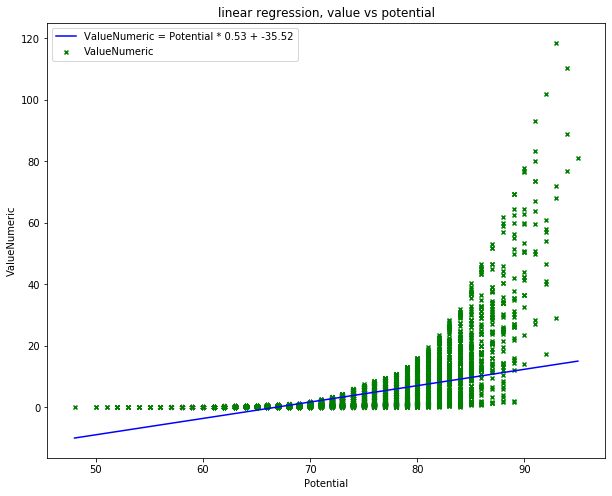

In [31]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, c='b', 
         label=f'ValueNumeric = Potential * {reg_result[0]:.2f} + {reg_result[1]:.2f}')
plt.scatter(fifa['Potential'], 
            fifa['ValueNumeric'],#mpg, 
            marker='x', 
            c='g', 
            s=16,
            label='ValueNumeric')
plt.title('linear regression, value vs potential')
plt.xlabel('Potential')
plt.ylabel('ValueNumeric')
plt.legend()
plt.show()